# HOUSE RENT

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab
import warnings
warnings.filterwarnings('ignore')

## Exploring Data

In [3]:
#Dataset load
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats.
* Size: Size of the Houses/Apartments/Flats in Square Feet.
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
* Area Locality: Locality of the Houses/Apartments/Flats.
* City: City where the Houses/Apartments/Flats are Located.
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
* Bathroom: Number of Bathrooms.
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [4]:
df.shape

(4746, 12)

* 4746 rows
* 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


1. Looks like no null data
2. Posted On: has object datatype so convert it

In [6]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


* possible outliers
* 4746 rows 12 columns
Range: 13 Apr 2022 to 11 Jul 2022 – barely three months of activity.
* The market is dominated by 2 BHK / 2‑bath units.
* A handful of 6‑BHK or 10‑bath listings are extreme outliers (very high‑end or data entry errors). Consider capping or treating them separately.
* The median rent is ₹16 k; the mean is slightly higher at ₹35 k, indicating positive skew. 

In [8]:
# checking null values
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No Null value

In [9]:
# Duplicate value
df.duplicated().sum()

np.int64(0)

No Duplicate Value

In [10]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

* Point of Contact,Tenant Preferred, Furnishing Status, Area Type has 3 values only.
* 6 values for BHK

In [11]:
print("Mean House Rent:", round(df["Rent"].mean()))

print("Median House Rent:", round(df["Rent"].median()))

print("Highest House Rent:", round(df["Rent"].max()))

print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


In [12]:
df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

## EDA

In [13]:
numeric_df = df.select_dtypes(include='number')
numeric_df

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [14]:
numeric_df.skew()

BHK          0.599216
Rent        21.409942
Size         2.299892
Bathroom     1.272951
dtype: float64

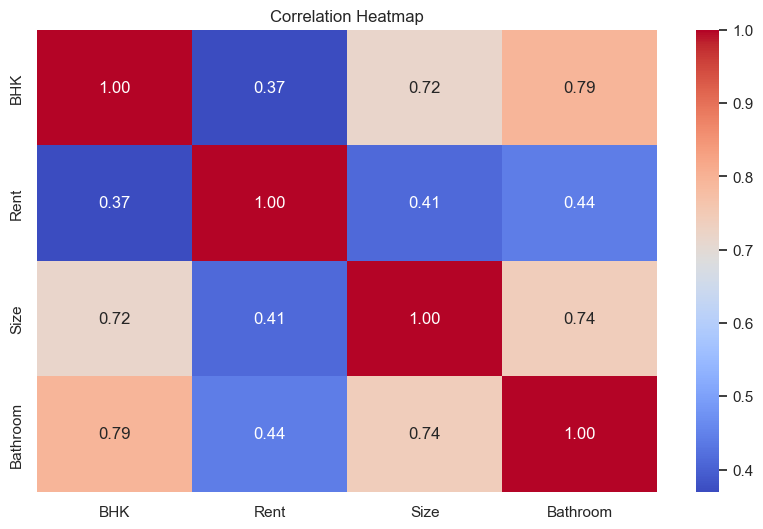

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Very strong positive correlation. More bedrooms usually mean more bathrooms. consider multicollinearity.
* Strong positive correlation. Larger homes tend to have more bathrooms, which is logical. Again, signals potential redundancy.
* More bedrooms generally imply a larger size.

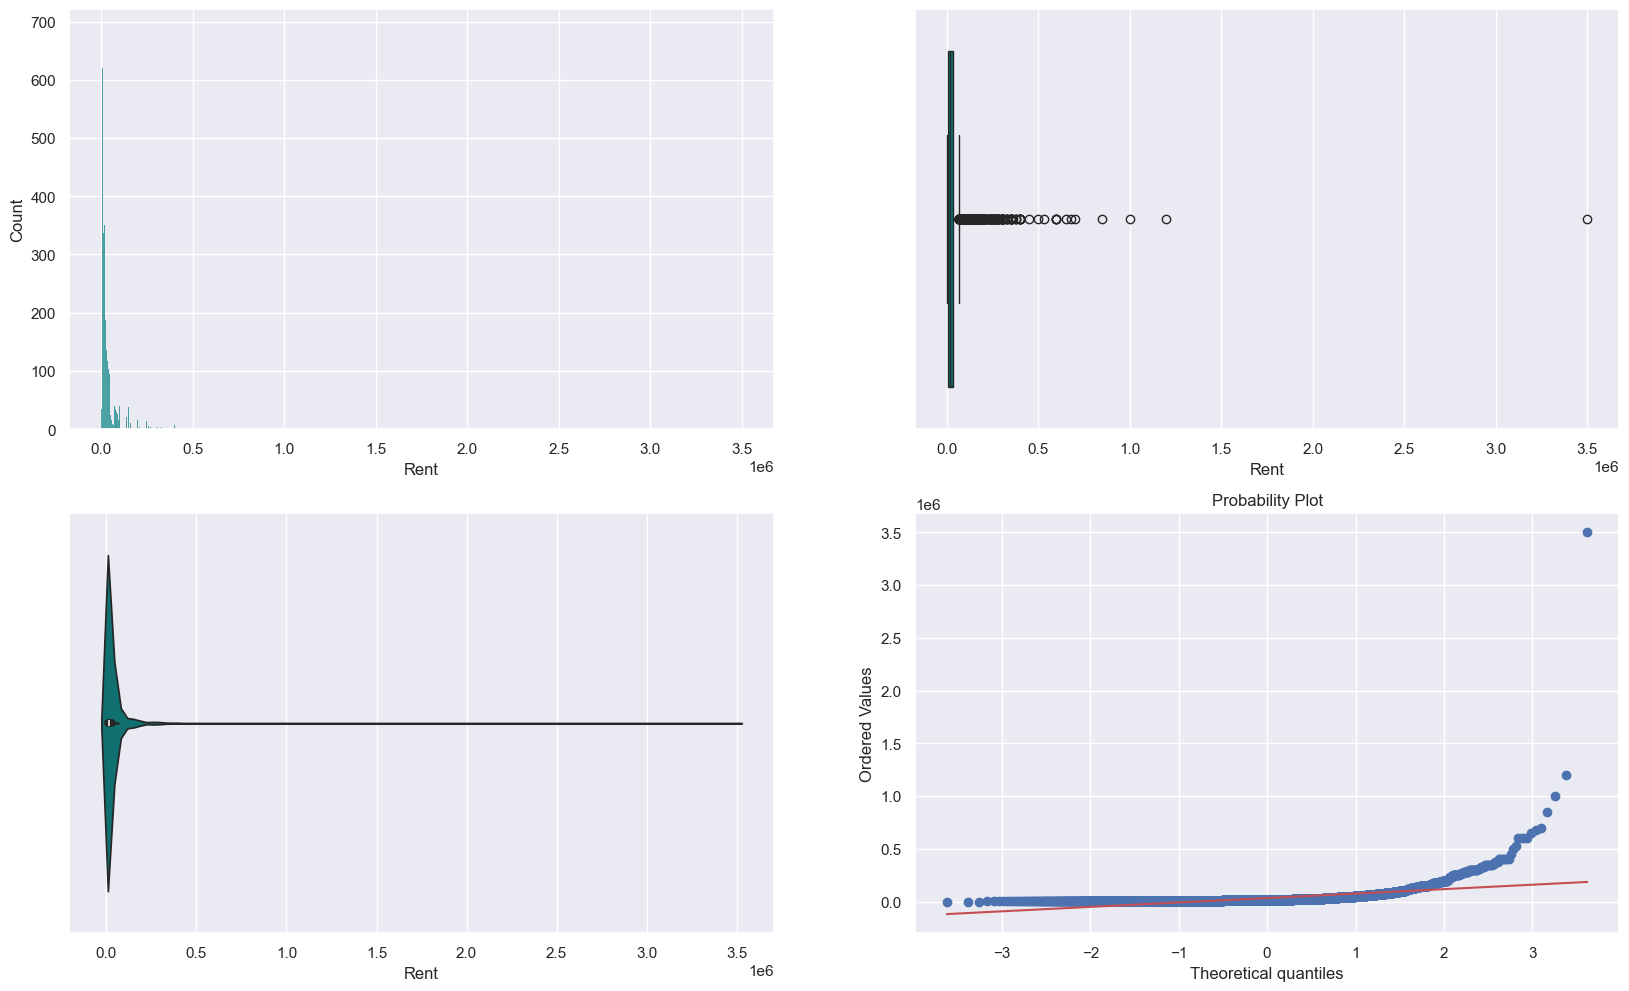

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['Rent'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['Rent'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(df['Rent'], plot=pylab)
pylab.show()

There are definitely some outliers present here which might cause problems later during modelling, therefore, I will apply boxcox transformation to it and I will also remove some of the extreme outliers

In [17]:
mean_rent=df.groupby('BHK')['Rent'].mean().sort_values()
print(mean_rent)

BHK
1     14139.223650
2     22113.864018
3     55863.062842
6     73125.000000
4    168864.555556
5    297500.000000
Name: Rent, dtype: float64


<Axes: xlabel='BHK', ylabel='Size'>

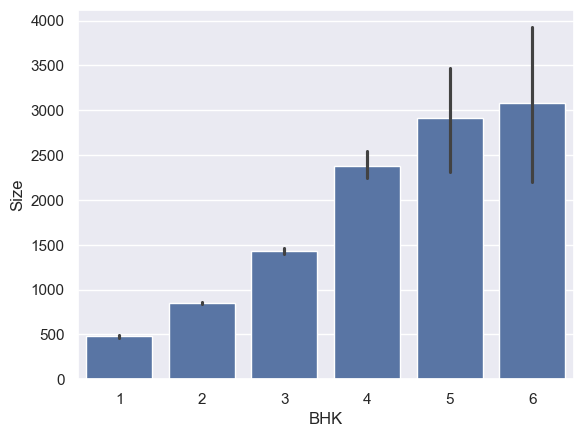

In [18]:
sns.barplot(x = df['BHK'], y = df['Size'], data = df)

In [19]:
max_rent = df['Rent'].max()
index_max_rent = df[df['Rent'] == max_rent].index
df = df.drop(index_max_rent)

bc_result = boxcox(df['Rent'])
boxcox_y = bc_result[0]
lam = bc_result[1]

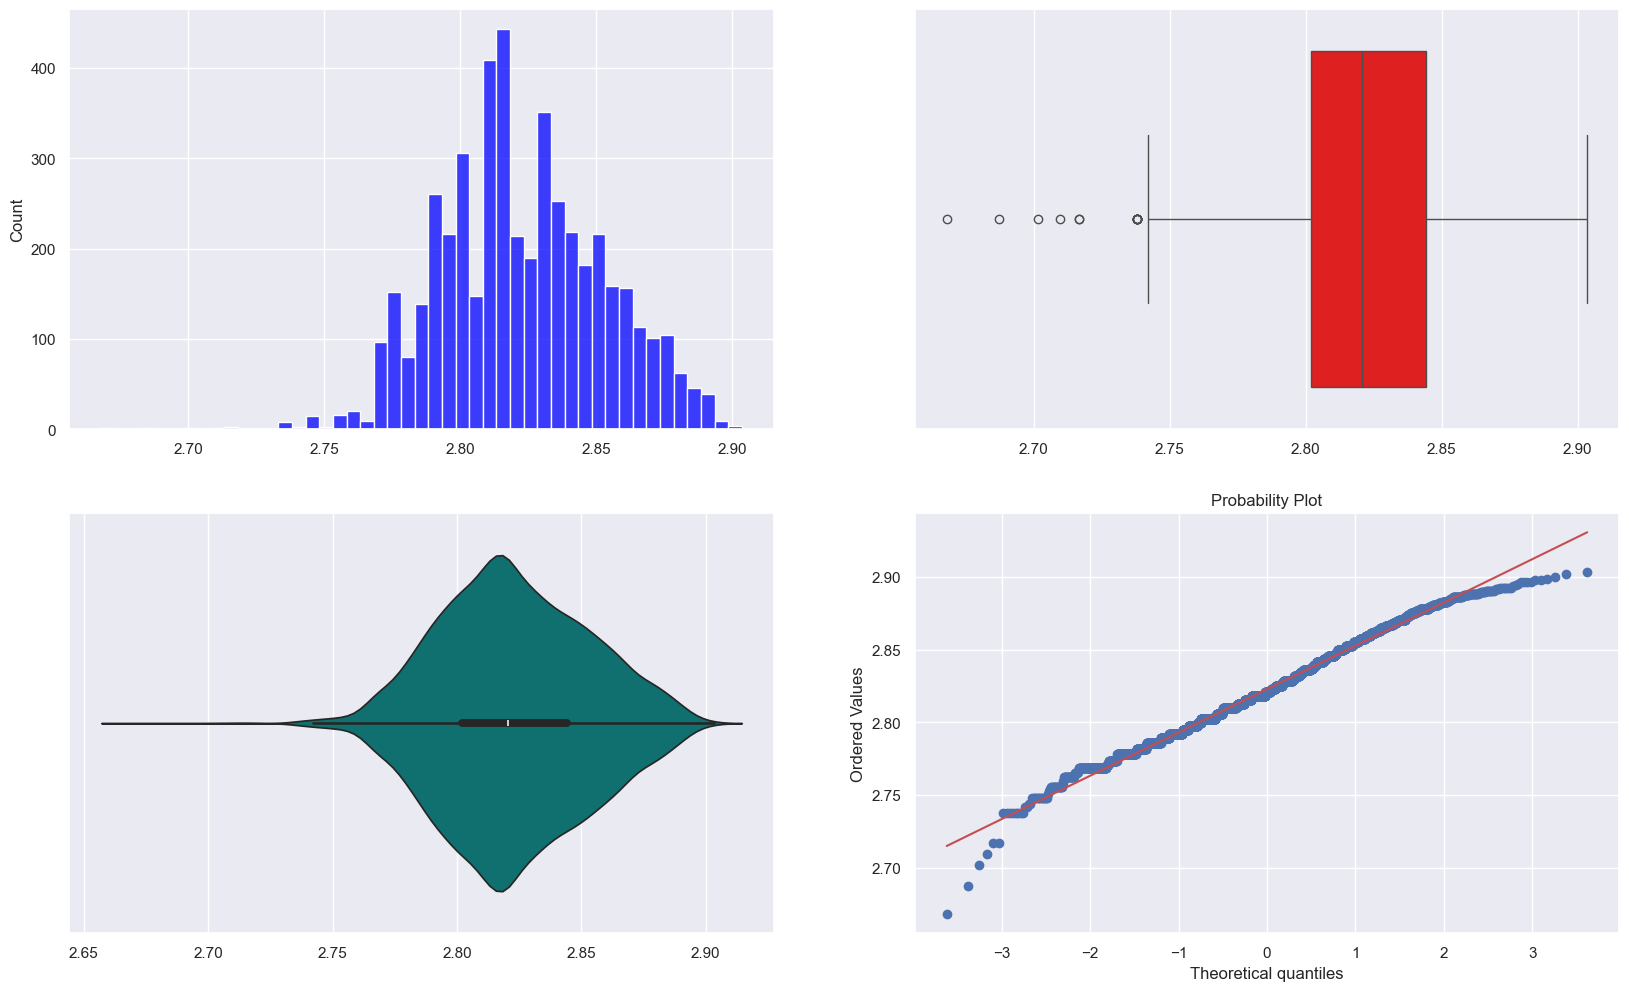

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = boxcox_y, color='blue', ax= ax[0, 0])
ax2 = sns.boxplot(x = boxcox_y, ax= ax[0, 1], color= 'red')
ax3 = sns.violinplot(x = boxcox_y, ax= ax[1, 0], color= 'teal')
ax4 = probplot(boxcox_y, plot=pylab)
pylab.show()

Not much Skewed

In [21]:
mean_size=df.groupby('BHK')['Size'].mean().sort_values()
print(mean_size)

BHK
1     478.907455
2     852.072848
3    1431.393801
4    2382.190476
5    2910.947368
6    3075.000000
Name: Size, dtype: float64


<Axes: >

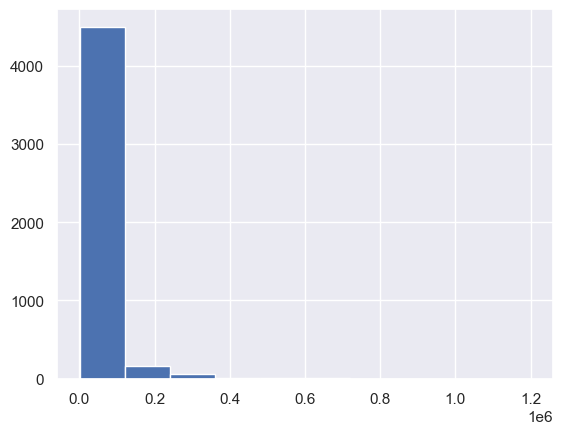

In [22]:
df['Rent'].hist()

Right Skewed

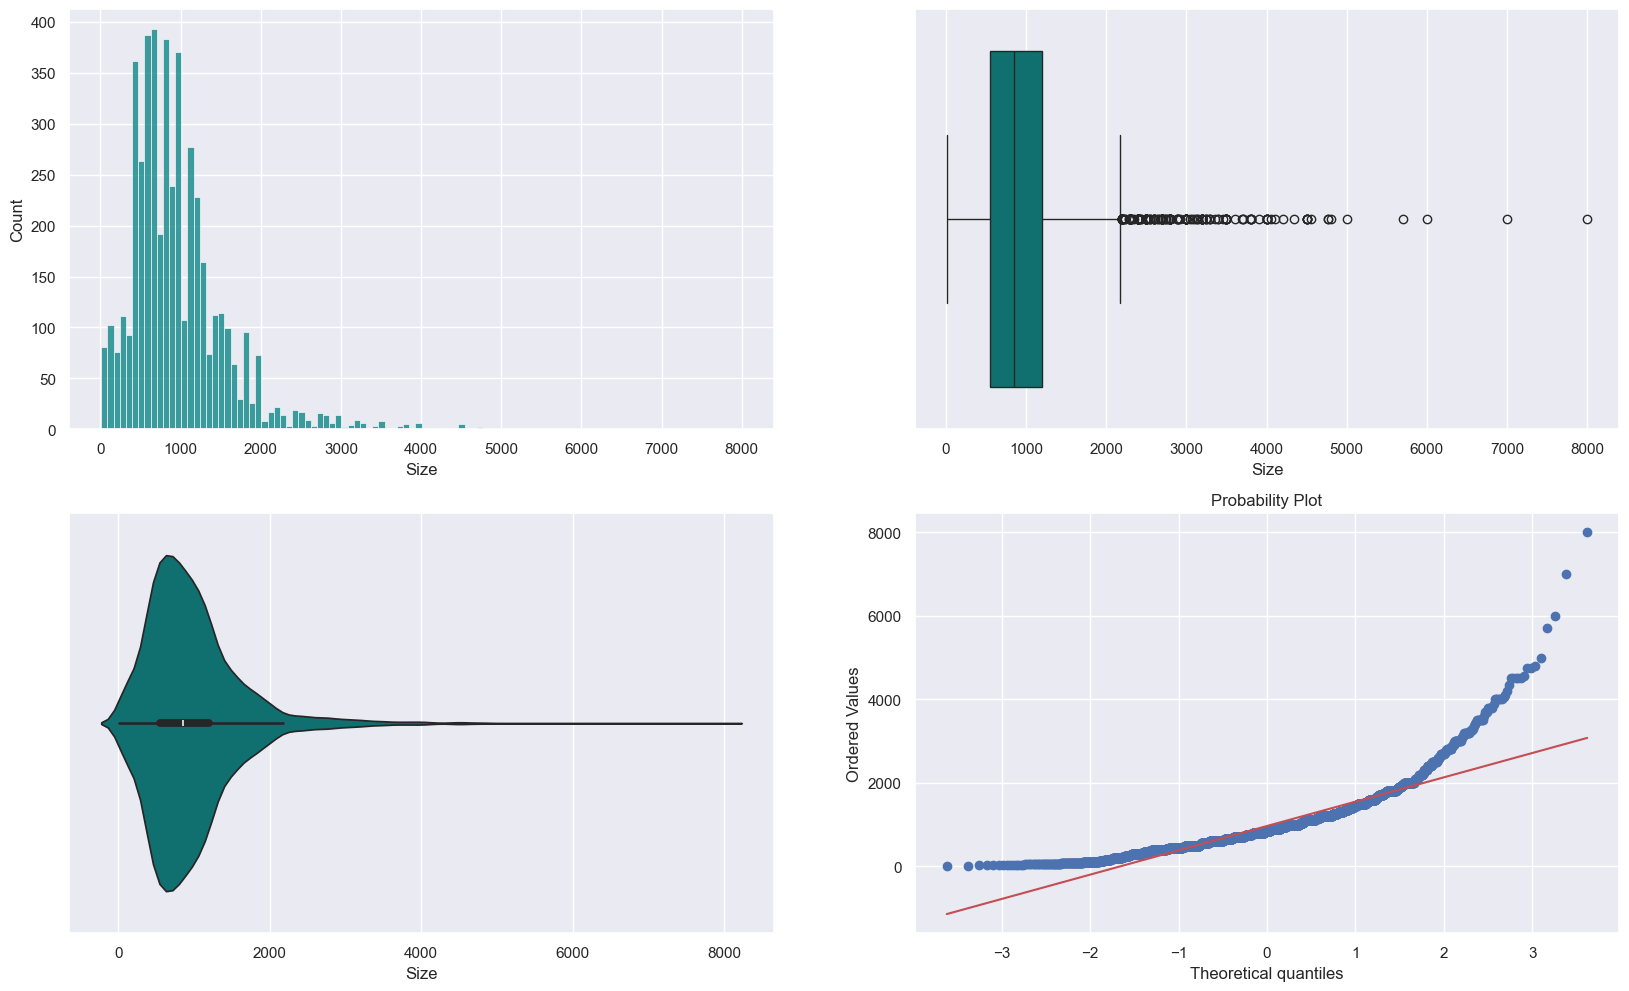

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(df['Size'], plot=pylab)
pylab.show()

Distribution of size is skewed as well, let us apply boxcox transformation to this feature as well

<Axes: xlabel='Rent'>

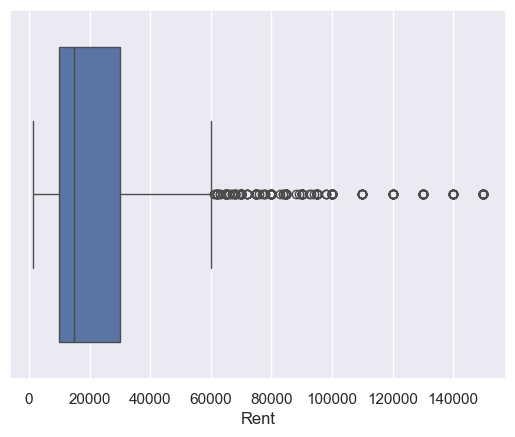

In [24]:
sns.boxplot(x = df['Rent'][df['Rent'] <= 150000])

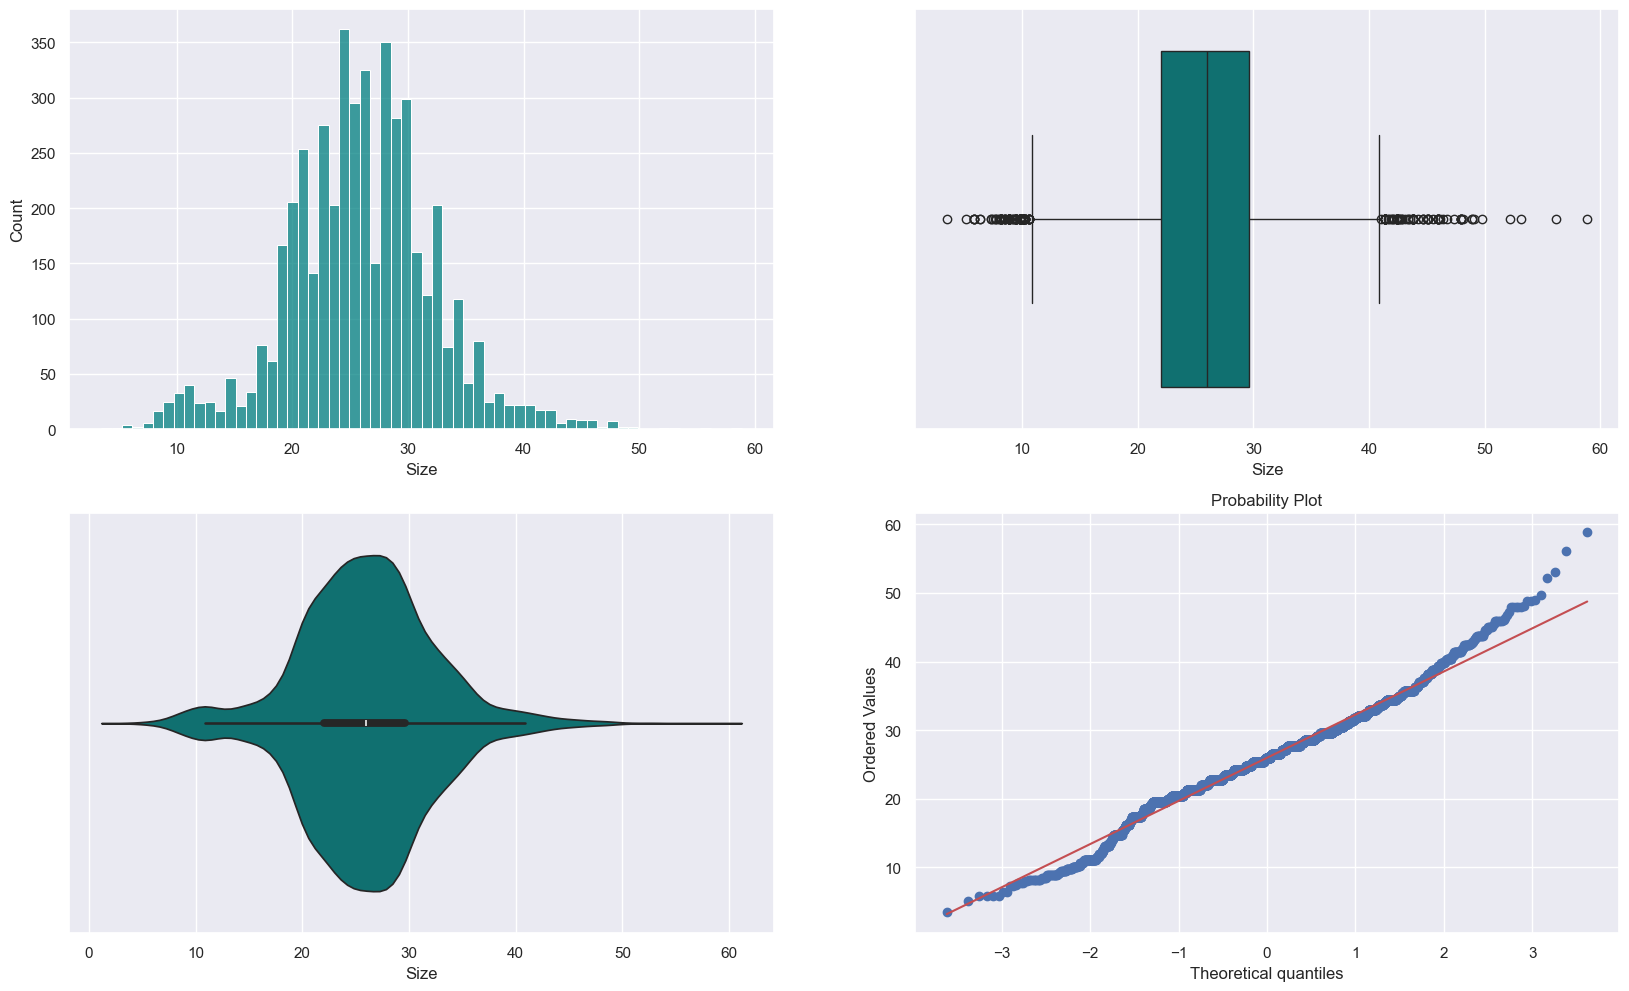

In [25]:
df['Size'] = boxcox(df['Size'])[0]
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(df['Size'], plot=pylab)
pylab.show()

In [26]:
meancities = df.groupby('City')['Rent'].mean().sort_values()
print(meancities)

City
Kolkata      11645.173664
Hyderabad    20555.048387
Bangalore    21039.774011
Chennai      21614.092031
Delhi        29461.983471
Mumbai       85321.204733
Name: Rent, dtype: float64


<Axes: xlabel='City'>

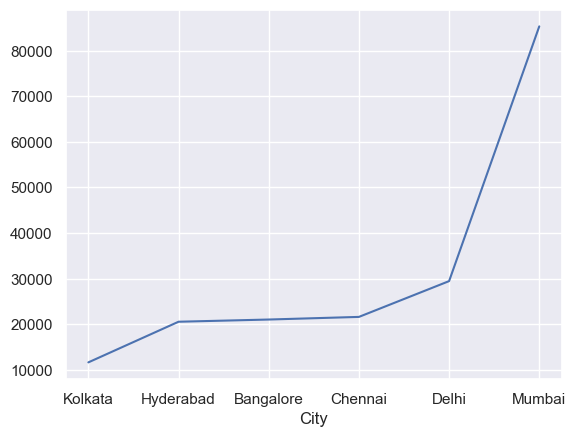

In [27]:
meancities.plot(kind="line")

Mumbai is has high rents

In [28]:
meanbhk = df.groupby('BHK')['Rent'].mean()
print(meanbhk)

BHK
1     14139.223650
2     22113.864018
3     52723.466727
4    168864.555556
5    297500.000000
6     73125.000000
Name: Rent, dtype: float64


<Axes: xlabel='BHK'>

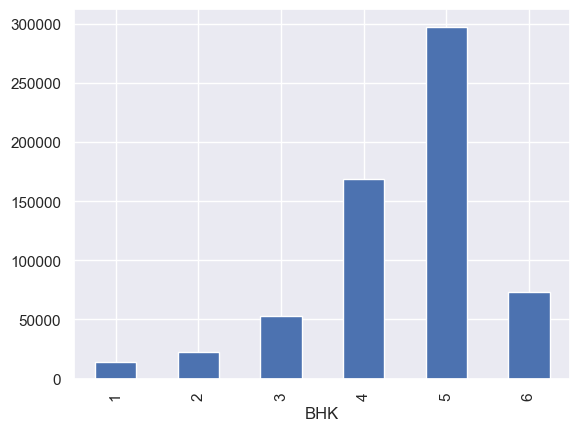

In [29]:
meanbhk.plot(kind="bar")

5 BHK has high rents

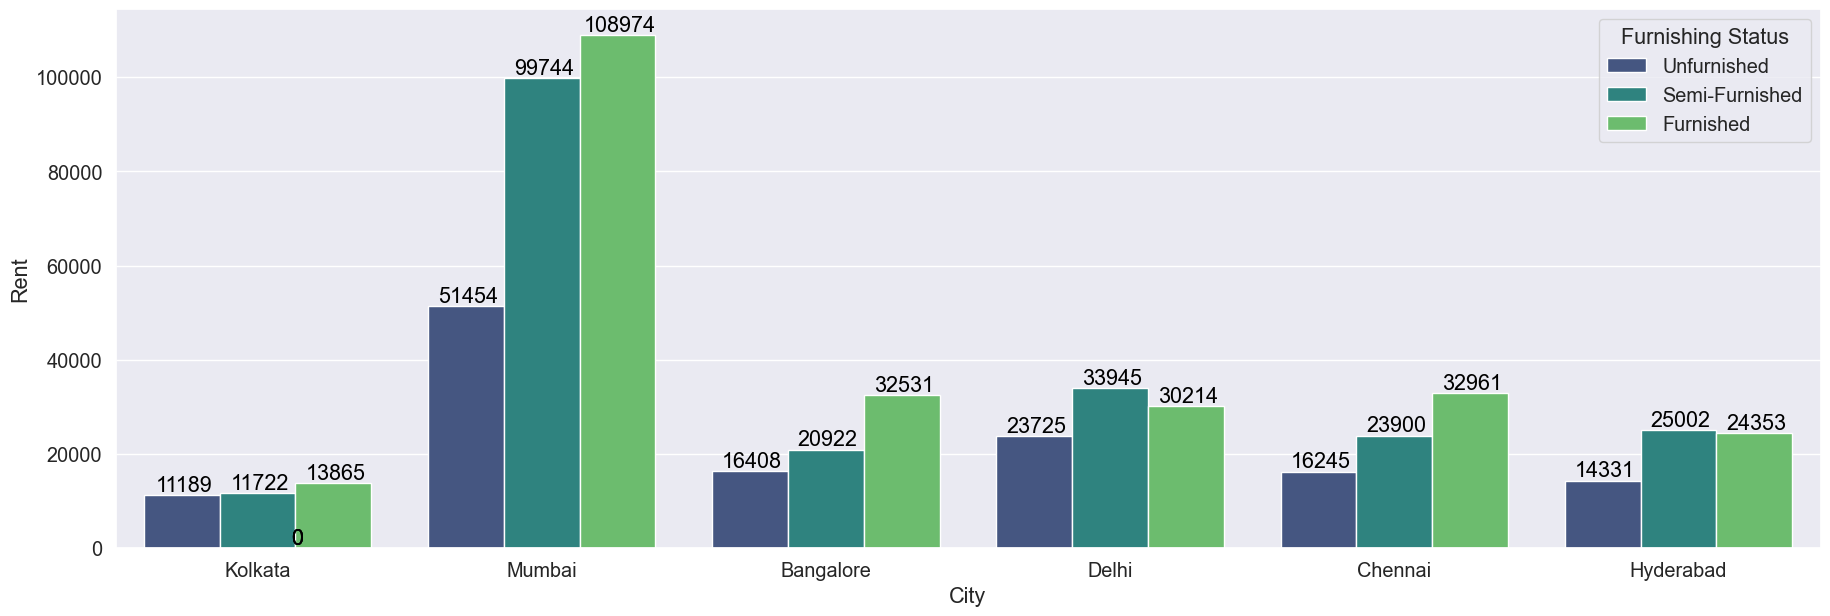

In [30]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Furnishing Status'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

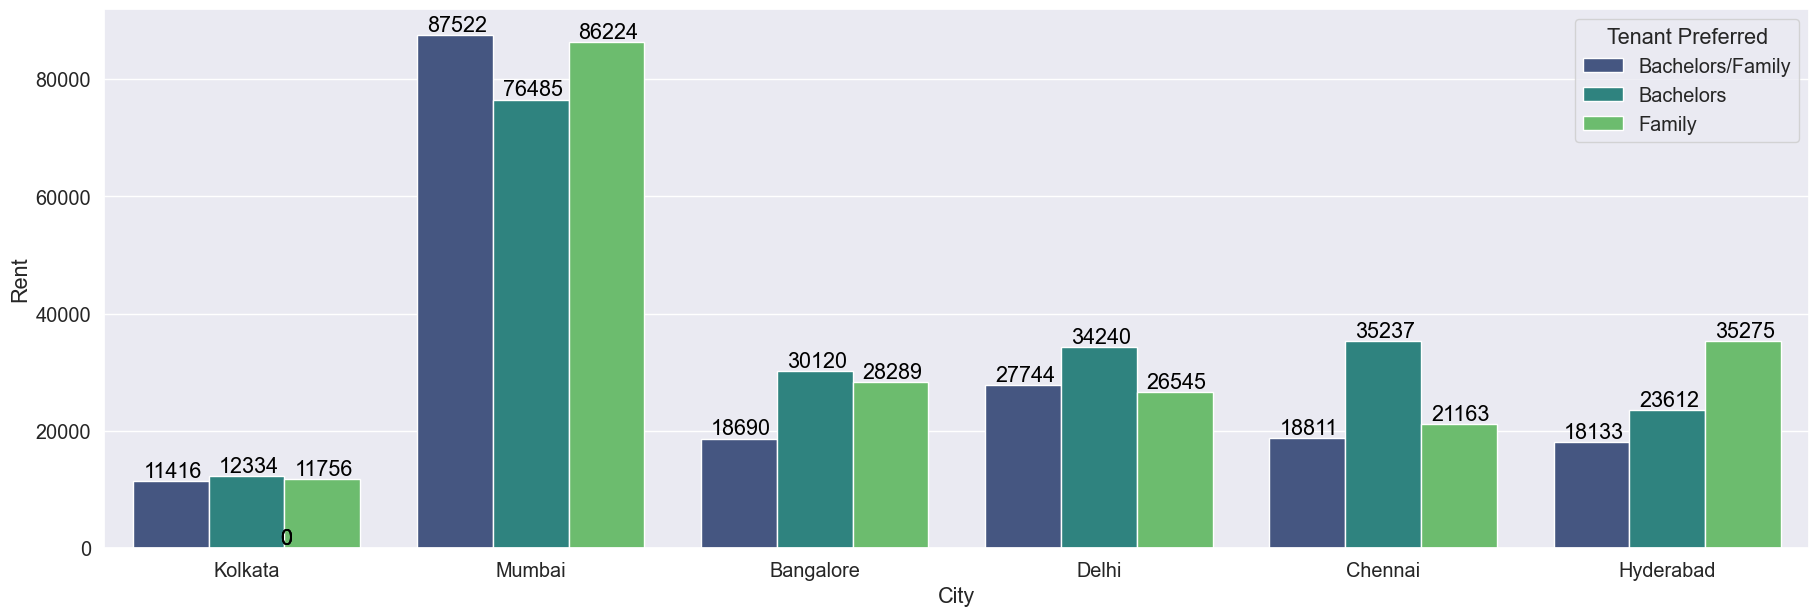

In [31]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Tenant Preferred'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [32]:
df = df[~df['Area Type'].str.contains("Built Area")]

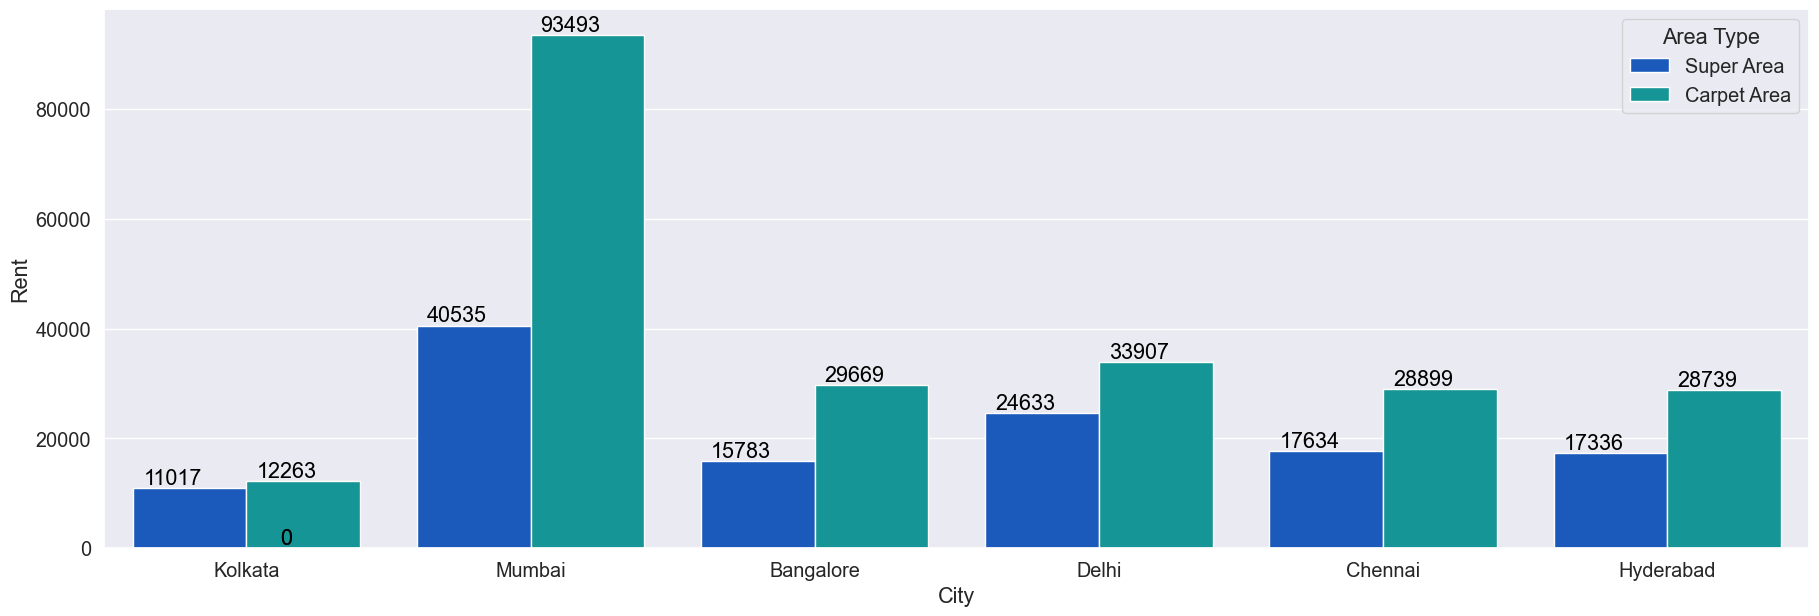

In [33]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Area Type'], 
                 palette='winter',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

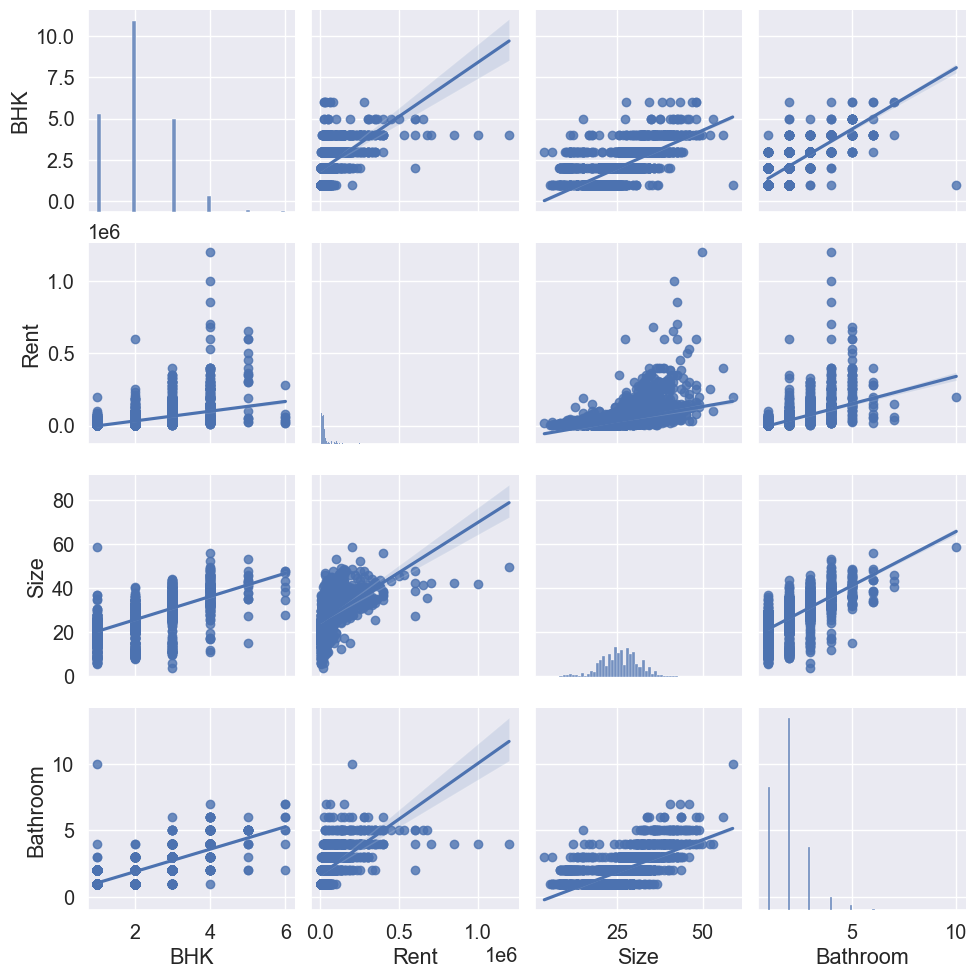

In [34]:
sns.pairplot(df, kind="reg")

In [35]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4743.000000,4.743000e+03,4743.000000,4743.000000
mean,2.083913,3.427323e+04,25.988153,1.965844
std,0.832263,5.976446e+04,6.335816,0.884573
min,1.000000,1.200000e+03,3.485707,1.000000
25%,2.000000,1.000000e+04,22.033850,1.000000
50%,2.000000,1.600000e+04,25.998849,2.000000
75%,3.000000,3.300000e+04,29.581624,2.000000
max,6.000000,1.200000e+06,58.861862,10.000000


### Univariate

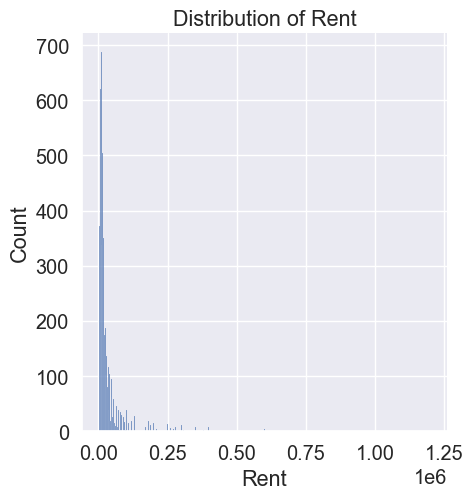

distribution highly skewed to the right


In [36]:
def vis_dist(df, col, lim=False):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    if lim:
        plt.xlim(0, 4000)
    return plt.show()
vis_dist(df, 'Rent')
print("distribution highly skewed to the right")

In [37]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [38]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,28.637808,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,25.411054,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,27.635364,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,25.411054,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,25.998849,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Bivariate

## Feature Engineering

In [40]:
df['Floor']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4743, dtype: object

In [41]:
df = df.join(df['Floor'].str.split('out of',n=1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
df['Floor Level'] = df.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)

df.drop('Floor', axis=1, inplace=True)
df = df.dropna()
df['Floor Level'] = df['Floor Level'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)

In [42]:
print(df['Point of Contact'].value_counts())
print()
print(df['Area Type'].value_counts())

Point of Contact
Contact Owner      3210
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64

Area Type
Super Area     2444
Carpet Area    2295
Name: count, dtype: int64


In [43]:
df = df[~df['Point of Contact'].str.contains("Contact Builder")]

In [44]:
df['Posted On'] = pd.to_datetime(df['Posted On'], errors='coerce')

In [45]:
df['month posted'] = df['Posted On'].dt.month
df['day posted'] = df['Posted On'].dt.day
df['day of week posted'] = df['Posted On'].dt.day_of_week
df['quarter poster'] = df['Posted On'].dt.quarter

df.drop('Posted On', axis = 1, inplace= True)

In [46]:
print(df.duplicated().sum())

4


No Duplicates

In [47]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster
0,2,10000,28.637808,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,2,5,18,2,2
1,2,20000,25.411054,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,13,4,2
2,2,17000,27.635364,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,16,0,2
3,2,10000,25.411054,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2,7,4,0,3
4,2,7500,25.998849,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2,5,9,0,2


## Encoding

In [48]:
print(df.duplicated().sum())
df = df.drop_duplicates()


4


In [49]:
def one_hot_encode(df, column):
    encoded = pd.get_dummies(df[column], drop_first= True)
    df = df.drop(column, axis = 1)
    df = df.join(encoded)
    return df

In [50]:
df = df.drop('Area Locality', axis= 1)

In [51]:
columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in columns:
    df = one_hot_encode(df, col)

In [52]:
df.head()

,BHK,Rent,Size,Bathroom,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,10000,28.637808,2,2,2,5,18,2,2,...,False,False,False,True,False,False,True,True,False,True
1,2,20000,25.411054,1,3,3,5,13,4,2,...,False,False,False,True,False,True,False,True,False,True
2,2,17000,27.635364,1,3,3,5,16,0,2,...,False,False,False,True,False,True,False,True,False,True
3,2,10000,25.411054,1,2,2,7,4,0,3,...,False,False,False,True,False,False,True,True,False,True
4,2,7500,25.998849,1,2,2,5,9,0,2,...,False,False,False,True,False,False,True,False,False,True


## MODEL

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [54]:
X = df.drop('Rent', axis=1)   # Replace 'target' with actual target column name
y = df['Rent']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
y_pred = lr_model.predict(X_test)

In [58]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.5562765322075967
MAE: 20314.462239677476
MSE: 854934451.8987745
RMSE: 29239.26216406246


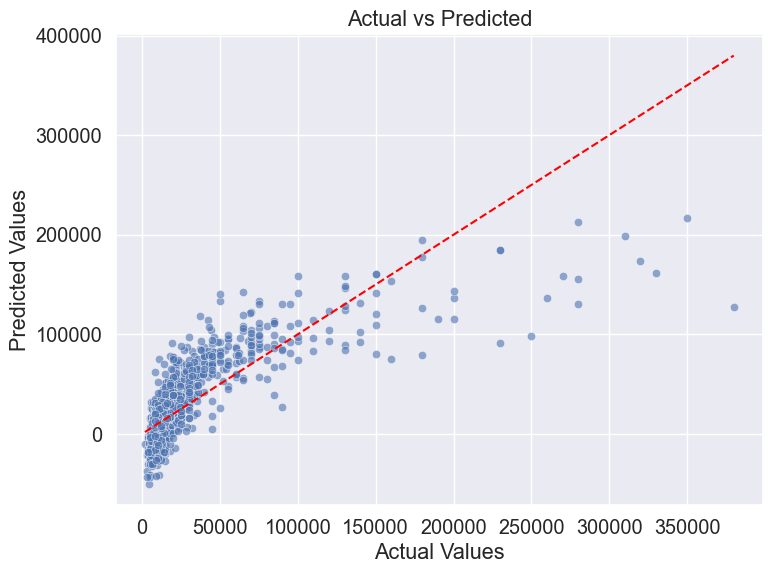

In [59]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

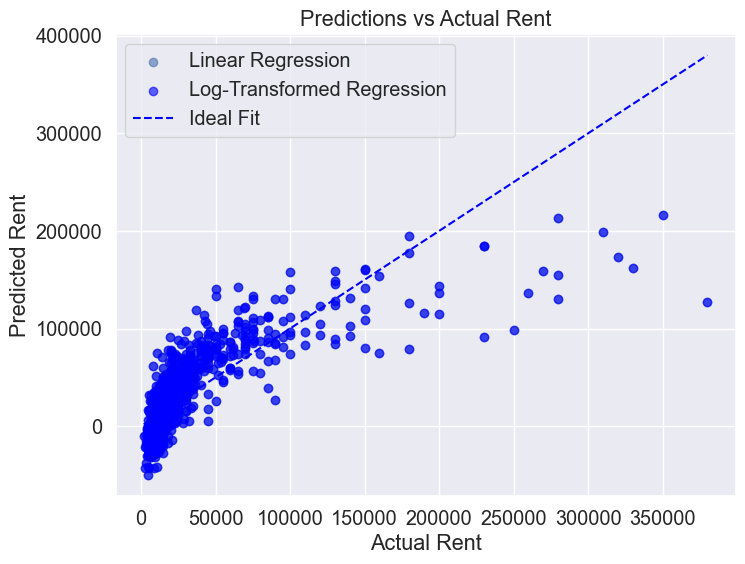

In [60]:
# Step 11: Visualizations
# Scatter plot for predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred, alpha=0.6, label="Log-Transformed Regression", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Predictions vs Actual Rent")
plt.legend()
plt.show()

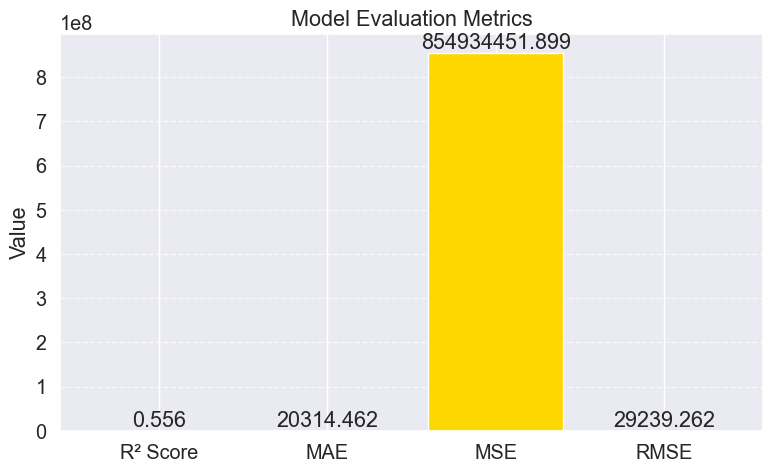

In [61]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


metrics = ['R² Score', 'MAE', 'MSE', 'RMSE']
values = [r2, mae, mse, rmse]


plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'gold', 'mediumseagreen'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()